# นายณัฐวุฒิ อกนิษฐ์ศุภร 61070296

# Task 1: API Chosen

ข้อมูลภาพยนตร์จากเว็บไซต์ The Movie Database (TMDb) ซึ่งเป็นเว็บที่เก็บข้อมูลของภาพยนตร์แต่ละเรื่องไว้ประกอบไปด้วย ค่าความนิยม ประเภทภาพยนตร์ วันฉาย เรื่องย่อ และอื่นๆ โดยข้อมูลนี่เราสามารถแสดงให้เห็นได้ว่าภาพยนตร์ประเภทใดที่สามารถสร้างค่าความนิยมได้สูงในช่วงเวลาใดของแต่ละปีและทราบถึงค่าเฉลี่ยคะแนนโหวดของแต่ละประเภทภาพยนตร์ตั้งแต่ปี 2013-2020

- API Provider in https://developers.themoviedb.org/3/getting-started/introduction

## Import Packages Etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import urllib
import csv

## Define Web API key

In [3]:
api_key = "7a9375b362fd6eaccb0c036bfa16b282"

# Task 2: Collect data from chosen API(s)

ทำการเก็บข้อมูลจาก API โดยข้อมูลที่ได้จะเป็นรายละเอียดของภาพยนตร์แต่ละเรื่องโดยมีการ Filter เฉพาะภาพยนตร์ที่ใช้ภาษา en-US, เรียงค่าความนิยมจากมากสู่น้อย และทำการฉายตั้งแต่ปี 2013 ขึ้นไป

In [4]:
url = "https://api.themoviedb.org/3/discover/movie?api_key="+ api_key + "&language=en-US&sort_by=popularity.desc&page=1&primary_release_date.gte=2013-01-01"
response = urllib.request.urlopen(url)
raw_json = response.read().decode("utf-8")
data = json.loads(raw_json)
data

{'page': 1,
 'total_results': 10000,
 'total_pages': 500,
 'results': [{'popularity': 2356.996,
   'vote_count': 1523,
   'video': False,
   'poster_path': '/riYInlsq2kf1AWoGm80JQW5dLKp.jpg',
   'id': 497582,
   'adult': False,
   'backdrop_path': '/kMe4TKMDNXTKptQPAdOF0oZHq3V.jpg',
   'original_language': 'en',
   'original_title': 'Enola Holmes',
   'genre_ids': [80, 18, 9648],
   'title': 'Enola Holmes',
   'vote_average': 7.7,
   'overview': 'While searching for her missing mother, intrepid teen Enola Holmes uses her sleuthing skills to outsmart big brother Sherlock and help a runaway lord.',
   'release_date': '2020-09-23'},
  {'popularity': 1792.051,
   'vote_count': 82,
   'video': False,
   'poster_path': '/6CoRTJTmijhBLJTUNoVSUNxZMEI.jpg',
   'id': 694919,
   'adult': False,
   'backdrop_path': '/pq0JSpwyT2URytdFG0euztQPAyR.jpg',
   'original_language': 'en',
   'original_title': 'Money Plane',
   'genre_ids': [28],
   'title': 'Money Plane',
   'vote_average': 5.9,
   'overvi

ทำการเก็บข้อมูลจาก API โดยข้อมูลที่ได้เป็นรายชื่อของประเภทภาพยนตร์กับ ID ประเภทภาพยนตร์นั้น

In [5]:
urlg = "https://api.themoviedb.org/3/genre/movie/list?api_key="+ api_key + "&language=en-US"
response = urllib.request.urlopen(urlg)
raw_json = response.read().decode("utf-8")
genres = json.loads(raw_json)
genres

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

# Task 3. Parse the collected data, and store it in an appropriate file format

เนื่องจากข้อมูลของ API นั้นทำการแบ่งเป็น Page จึงทำการลูปเพื่อเก็บข้อมูลให้เพียงพอแก่การวิเคราะห์โดยแต่ละ Page นั้นมีข้อมูลทั้งหมด 20 Row

In [6]:
movie = []

for i in range(1,27):
    url = 'https://api.themoviedb.org/3/discover/movie?api_key='+ api_key + '&language=en-US&sort_by=popularity.desc&page='+ str(i) + '&primary_release_date.gte=2013-01-01'
    response = urllib.request.urlopen(url)
    raw_json = response.read().decode("utf-8")
    data = json.loads(raw_json)
    movie = movie + data["results"]

ทำการ Save ข้อมูลของภาพยนตร์ลง CSV

In [7]:
csv_columns = ['popularity','vote_count','video','poster_path','id','adult','backdrop_path','backdrop_path','original_language','original_title','genre_ids','title','vote_average','overview','release_date']
csv_file = "Movie_api.csv"
with open(csv_file, 'w', newline="", encoding="utf-8") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    for datas in movie:
        writer.writerow(datas)

ทำการ Save ข้อมูลของ ID กับรายชื่อประเภทของภาพยนตร์ลง CSV

In [8]:
csv_columns = ['id','name']
csv_file = "Genres_api.csv"
with open(csv_file, 'w', newline="", encoding="utf-8") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    for datas in genres['genres']:
        writer.writerow(datas)

# Task 4: Load and represent the data

ข้อมูลของแต่ละภาพยนตร์โดยมี Column ดังนี่
- ID รหัสของภาพยนตร์
- Popularity ค่าความนิยมของภาพยนตร์
- Vote Count จำนวนที่มีการโหวตภาพยนต์นั้น
- Video ภาพยนตร์นั้นมี Video ตัวอย่างหรือไม่
- Poster path ภาพ Poster
- Adult เรตของภาพยนตร์
- Backdrop path ภาพ Backdrop 1
- Backdrop path.1 ภาพ Backdrop 2
- Original language ภาษาของภาพยนตร์
- Original title ชื่อภาพยนตร์แบบเต็ม
- Genre ids ประเภทของภาพยนตร์
- Title ชื่อภาพยนตร์
- Vote average เรตติ้งของภาพยนตร์
- Overview เรื่องย่อของภาพยนตร์
- Release date วันฉายของภาพยนตร์

In [9]:
movies=pd.read_csv("Movie_api.csv",index_col="id")
movies.head(10)

,popularity,vote_count,video,poster_path,adult,backdrop_path,backdrop_path.1,original_language,original_title,genre_ids,title,vote_average,overview,release_date
id,,,,,,,,,,,,,,
497582,2356.996,1523,False,/riYInlsq2kf1AWoGm80JQW5dLKp.jpg,False,/kMe4TKMDNXTKptQPAdOF0oZHq3V.jpg,/kMe4TKMDNXTKptQPAdOF0oZHq3V.jpg,en,Enola Holmes,"[80, 18, 9648]",Enola Holmes,7.7,"While searching for her missing mother, intrep...",2020-09-23
694919,1792.051,82,False,/6CoRTJTmijhBLJTUNoVSUNxZMEI.jpg,False,/pq0JSpwyT2URytdFG0euztQPAyR.jpg,/pq0JSpwyT2URytdFG0euztQPAyR.jpg,en,Money Plane,[28],Money Plane,5.9,A professional thief with $40 million in debt ...,2020-09-29
623634,1448.288,39,False,/qOYf3L6eyCO027JoeM33pTJcNSR.jpg,False,/fbjzxbWAUijs0fsQ6Hlbls0NtAj.jpg,/fbjzxbWAUijs0fsQ6Hlbls0NtAj.jpg,ca,La innòcencia,[18],The Innocence,6.2,Lis is a teenager whose dream is to become a c...,2020-01-10
621870,1258.996,100,False,/x0fojycYFbT0eqXXbEO6aDqkalX.jpg,False,/uN4BEmphubHVBSFibqiOwi7wq28.jpg,/uN4BEmphubHVBSFibqiOwi7wq28.jpg,en,Secret Society of Second Born Royals,"[28, 12, 35, 14]",Secret Society of Second Born Royals,7.2,"Sam is a teenage royal rebel, second in line t...",2020-09-25
337401,1395.955,2257,False,/aKx1ARwG55zZ0GpRvU2WrGrCG9o.jpg,False,/zzWGRw277MNoCs3zhyG3YmYQsXv.jpg,/zzWGRw277MNoCs3zhyG3YmYQsXv.jpg,en,Mulan,"[28, 12, 18, 14]",Mulan,7.4,When the Emperor of China issues a decree that...,2020-09-04
724989,1165.121,115,False,/ugZW8ocsrfgI95pnQ7wrmKDxIe.jpg,False,/86L8wqGMDbwURPni2t7FQ0nDjsH.jpg,/86L8wqGMDbwURPni2t7FQ0nDjsH.jpg,en,Hard Kill,"[28, 53]",Hard Kill,5.0,The work of billionaire tech CEO Donovan Chalm...,2020-08-25
539885,1045.033,418,False,/qzA87Wf4jo1h8JMk9GilyIYvwsA.jpg,False,/54yOImQgj8i85u9hxxnaIQBRUuo.jpg,/54yOImQgj8i85u9hxxnaIQBRUuo.jpg,en,Ava,"[28, 80, 18, 53]",Ava,6.0,A black ops assassin is forced to fight for he...,2020-07-02
734309,1042.148,123,False,/9Rj8l6gElLpRL7Kj17iZhrT5Zuw.jpg,False,/7fvdg211A2L0mHddvzyArRuRalp.jpg,/7fvdg211A2L0mHddvzyArRuRalp.jpg,en,Santana,[28],Santana,5.6,Two brothers — one a narcotics agent and the o...,2020-08-28
718444,931.488,284,False,/uOw5JD8IlD546feZ6oxbIjvN66P.jpg,False,/x4UkhIQuHIJyeeOTdcbZ3t3gBSa.jpg,/x4UkhIQuHIJyeeOTdcbZ3t3gBSa.jpg,pt,Rogue,[28],Rogue,5.9,Battle-hardened O’Hara leads a lively mercenar...,2020-08-20


ข้อมูลของประเภทภาพยนตร์ใช้สำหรับแปลง ID ของประเภทภาพยนตร์เป็นชื่อประเภทภาพยนตร์โดยมี Column ดังนี่
- ID เป็นเลขรหัสของประเภทภาพยนตนร์
- Name ชื่อของประเภทภาพยนตร์

In [10]:
Genreslist=pd.read_csv("Genres_api.csv",index_col="id")
Genreslist.reset_index(inplace = True)
Genreslist

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


## เคลียร์ Column ที่ไม่ได้นำมาใช้ในการวิเคราห์และทำการแปลงประเภทของ Column

ทำการดูประเภทของแต่ละ Columns

In [11]:
movies.dtypes

popularity           float64
vote_count             int64
video                   bool
poster_path           object
adult                   bool
backdrop_path         object
backdrop_path.1       object
original_language     object
original_title        object
genre_ids             object
title                 object
vote_average         float64
overview              object
release_date          object
dtype: object

เนื่องจาก Column release_date เป็น String จึงทำการแปลงเป็น datetime เพื่อใช้ในการดึง ปี และ เดือน

In [12]:
movies['datetime'] = pd.to_datetime(movies.release_date)
movies.drop(columns = 'release_date',inplace = True)

In [13]:
movies.head(10)

,popularity,vote_count,video,poster_path,adult,backdrop_path,backdrop_path.1,original_language,original_title,genre_ids,title,vote_average,overview,datetime
id,,,,,,,,,,,,,,
497582,2356.996,1523,False,/riYInlsq2kf1AWoGm80JQW5dLKp.jpg,False,/kMe4TKMDNXTKptQPAdOF0oZHq3V.jpg,/kMe4TKMDNXTKptQPAdOF0oZHq3V.jpg,en,Enola Holmes,"[80, 18, 9648]",Enola Holmes,7.7,"While searching for her missing mother, intrep...",2020-09-23
694919,1792.051,82,False,/6CoRTJTmijhBLJTUNoVSUNxZMEI.jpg,False,/pq0JSpwyT2URytdFG0euztQPAyR.jpg,/pq0JSpwyT2URytdFG0euztQPAyR.jpg,en,Money Plane,[28],Money Plane,5.9,A professional thief with $40 million in debt ...,2020-09-29
623634,1448.288,39,False,/qOYf3L6eyCO027JoeM33pTJcNSR.jpg,False,/fbjzxbWAUijs0fsQ6Hlbls0NtAj.jpg,/fbjzxbWAUijs0fsQ6Hlbls0NtAj.jpg,ca,La innòcencia,[18],The Innocence,6.2,Lis is a teenager whose dream is to become a c...,2020-01-10
621870,1258.996,100,False,/x0fojycYFbT0eqXXbEO6aDqkalX.jpg,False,/uN4BEmphubHVBSFibqiOwi7wq28.jpg,/uN4BEmphubHVBSFibqiOwi7wq28.jpg,en,Secret Society of Second Born Royals,"[28, 12, 35, 14]",Secret Society of Second Born Royals,7.2,"Sam is a teenage royal rebel, second in line t...",2020-09-25
337401,1395.955,2257,False,/aKx1ARwG55zZ0GpRvU2WrGrCG9o.jpg,False,/zzWGRw277MNoCs3zhyG3YmYQsXv.jpg,/zzWGRw277MNoCs3zhyG3YmYQsXv.jpg,en,Mulan,"[28, 12, 18, 14]",Mulan,7.4,When the Emperor of China issues a decree that...,2020-09-04
724989,1165.121,115,False,/ugZW8ocsrfgI95pnQ7wrmKDxIe.jpg,False,/86L8wqGMDbwURPni2t7FQ0nDjsH.jpg,/86L8wqGMDbwURPni2t7FQ0nDjsH.jpg,en,Hard Kill,"[28, 53]",Hard Kill,5.0,The work of billionaire tech CEO Donovan Chalm...,2020-08-25
539885,1045.033,418,False,/qzA87Wf4jo1h8JMk9GilyIYvwsA.jpg,False,/54yOImQgj8i85u9hxxnaIQBRUuo.jpg,/54yOImQgj8i85u9hxxnaIQBRUuo.jpg,en,Ava,"[28, 80, 18, 53]",Ava,6.0,A black ops assassin is forced to fight for he...,2020-07-02
734309,1042.148,123,False,/9Rj8l6gElLpRL7Kj17iZhrT5Zuw.jpg,False,/7fvdg211A2L0mHddvzyArRuRalp.jpg,/7fvdg211A2L0mHddvzyArRuRalp.jpg,en,Santana,[28],Santana,5.6,Two brothers — one a narcotics agent and the o...,2020-08-28
718444,931.488,284,False,/uOw5JD8IlD546feZ6oxbIjvN66P.jpg,False,/x4UkhIQuHIJyeeOTdcbZ3t3gBSa.jpg,/x4UkhIQuHIJyeeOTdcbZ3t3gBSa.jpg,pt,Rogue,[28],Rogue,5.9,Battle-hardened O’Hara leads a lively mercenar...,2020-08-20


ดูข้อมูลของ Column adult ซึ่งเป็นประเภท Boolean จะเห็นได้ว่ามีแต่ False จึงจะทำการลบ Column นี่ไป

In [14]:
movies.groupby('adult').count()

,popularity,vote_count,video,poster_path,backdrop_path,backdrop_path.1,original_language,original_title,genre_ids,title,vote_average,overview,datetime
adult,,,,,,,,,,,,,
False,520,520,520,520,512,512,520,520,520,520,520,517,520


ดูข้อมูลของ Column video ซึ่งเป็นประเภท Boolean จะเห็นได้ว่ามีแต่ False จึงจะทำการลบ Column นี่ไป

In [15]:
movies.groupby('video').count()

,popularity,vote_count,poster_path,adult,backdrop_path,backdrop_path.1,original_language,original_title,genre_ids,title,vote_average,overview,datetime
video,,,,,,,,,,,,,
False,520,520,520,520,512,512,520,520,520,520,520,517,520


ทำการลบ Column ที่ไม่ได้นำมาใช้ในการวิเคราห์

In [16]:
movies.drop(columns = 'adult',inplace = True)
movies.drop(columns = 'poster_path' ,inplace = True)
movies.drop(columns = 'video',inplace = True)
movies.drop(columns = 'backdrop_path',inplace = True)
movies.drop(columns = 'backdrop_path.1',inplace = True)
movies.drop(columns = 'overview',inplace = True)
movies.drop(columns = 'original_title',inplace = True)
movies.drop(columns = 'original_language',inplace = True)

In [17]:
movies.head(10)

,popularity,vote_count,genre_ids,title,vote_average,datetime
id,,,,,,
497582,2356.996,1523,"[80, 18, 9648]",Enola Holmes,7.7,2020-09-23
694919,1792.051,82,[28],Money Plane,5.9,2020-09-29
623634,1448.288,39,[18],The Innocence,6.2,2020-01-10
621870,1258.996,100,"[28, 12, 35, 14]",Secret Society of Second Born Royals,7.2,2020-09-25
337401,1395.955,2257,"[28, 12, 18, 14]",Mulan,7.4,2020-09-04
724989,1165.121,115,"[28, 53]",Hard Kill,5.0,2020-08-25
539885,1045.033,418,"[28, 80, 18, 53]",Ava,6.0,2020-07-02
734309,1042.148,123,[28],Santana,5.6,2020-08-28
718444,931.488,284,[28],Rogue,5.9,2020-08-20


In [18]:
movies.shape

(520, 6)

In [19]:
movies.dtypes

popularity             float64
vote_count               int64
genre_ids               object
title                   object
vote_average           float64
datetime        datetime64[ns]
dtype: object

หาค่า Null ของข้อมูล

In [20]:
movies.isnull().sum()

popularity      0
vote_count      0
genre_ids       0
title           0
vote_average    0
datetime        0
dtype: int64

## Calculate summary statistics for the dataset.

In [21]:
movies.describe()

,popularity,vote_count,vote_average
count,520.000000,520.000000,520.000000
mean,165.707292,2433.280769,6.563654
std,208.582412,4133.452306,1.267728
min,41.032000,0.000000,0.000000
25%,77.255500,59.500000,6.075000
50%,102.470000,348.000000,6.700000
75%,160.509500,3119.250000,7.300000
max,2356.996000,23844.000000,8.600000


ทำการ Save ข้อมูลที่ผ่านการ Clear แล้วมา Save เป็นไฟล์ CSV

In [22]:
movies.to_csv ('Movie_Clean.csv', header=True)

# Task 5: Analyse and Summary
จาก API นั้นจะได้ข้อมูลเป็นค่าความนิยมของภาพยนตร์แต่ละเรื่องจึงจะทำการวิเคราห์ว่าภาพยนตร์ประเภทใดมีค่าความนิยมที่สูงและมียอดโหวตที่สูงโดยจะมีการแบ่งเป็นช่วงเวลาตามปีและตามเดือน

## จำนวนภาพยนตร์ที่ทำการฉายในแต่ละปีโดยแบ่งเป็นสัดส่วน
โดยจำนวนที่ภาพยนตร์ทำการฉายนั้นจะอยู่ในช่วง ปี 2013 ขึ้นไปจะเห็นได้ว่าจำนวนภาพยนตร์ที่ฉายนั้นมีจำนวนที่มากขึ้นทุกๆปีจนถึงปัจจุบัน

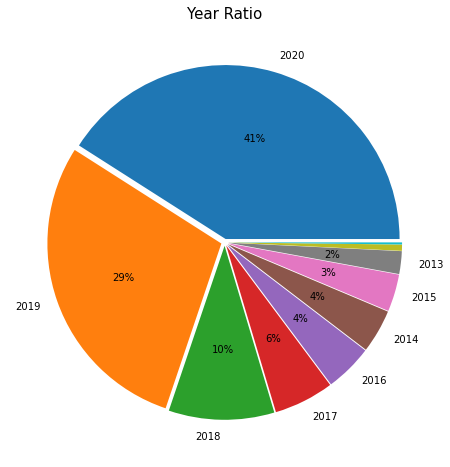

In [23]:
count = movies.datetime.dt.year.value_counts(normalize=True)
count.reset_index()
labels = []
for i in count.index:
    if count[i] > 0.01: #ถ้าสัดส่วนของปีนั้นน้อยกว่า 0.01 จะไม่แสดงเลขปีในกราฟ
        labels.append(i)
    else:
        labels.append('')
f, ax = plt.subplots(figsize=(8, 8))
plt.pie(count,labels=labels,autopct=lambda x:'{:1.0f}%'.format(x) if x > 1 else '',explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]) #ถ้าสัดส่วนความกว้างของกราฟน้อยกว่า 1 จะไม่แสดงเลข % ในกราฟ
plt.title('Year Ratio' ,fontsize=15)
plt.show()

## จำนวนของภาพยนตร์ในแต่ละประเภท
จากกราฟจะเห็นได้ว่าจำนวนของแต่ละประเภทของภาพยนตร์ว่าส่วนมากมีภาพยนตร์ประเภทอะไรซึ่งจะเห็นได้ว่าภาพยนตร์ประเภท Action นั้นมีมากที่สุดจากนั้นจะนำประเภทภาพยนตร์ที่มีจำนวนเยอะไปวิเคราะห์ต่อ

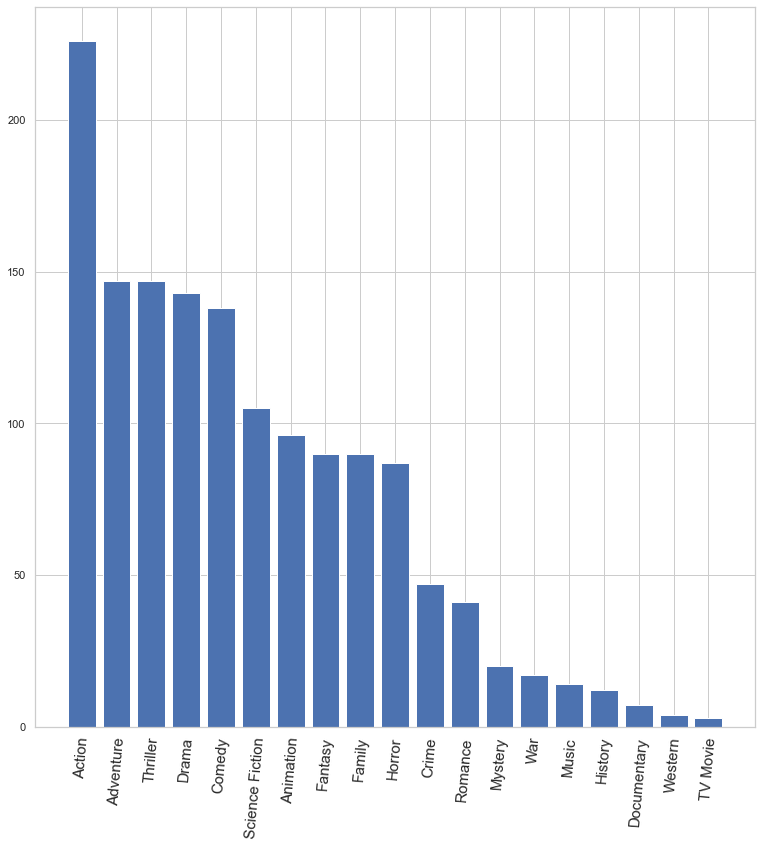

In [36]:
series = movies.genre_ids
sns.set(style="whitegrid")
d={}
lis = []
for i in range(series.size):
    l=eval(series.iloc[i])
    for x in l:
        d.setdefault(x,[])
        d[x].append(i)#ยัด Id ของแต่ละประเภทเป็น Key โดยมี Value เป็น Index ของแต่ละเรื่องที่อยู่ในประเภทนั้นๆ
for (k,v) in d.items():
    lis.append([k ,len(v)])#ทำการครอบ Len เพื่อดูจำนวนทั้งหมดของหนังประเภทนั้น
lis=sorted(lis,key=lambda x:x[1],reverse=True)
x = []
y = []
for i in lis: #เนื่องจากประเภทที่อยู่ใน Dataframe ของภาพยนตร์นั้นเป็น ID จึงทำการแปลงเป็นชื่อประเภทของภาพยนตร์ผ่าน ID
    for j in range(Genreslist.shape[0]):
        if i[0] == Genreslist.id.iloc[j]:#เทียบกับตารางประเภทภาพยนตร์
            x.append(Genreslist.name.iloc[j])#เพิ่มชื่อของประเภทภาพยนตร์ลงใน List x
    y.append(i[1])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.xticks(rotation=85, fontsize=15)
plt.show()
    


## Vote Average ของแต่ละปี
โดยจะเห็นได้ว่าปี 2020 นั้นมียอด Vote ที่มีการกระจายมากที่สุดและมี Outliner ที่ต่ำที่สุดส่วนในปี 2013 นั้นเป็นปีที่ยอด Vote นั้นมีการกระจายน้อยที่สุดแต่ก็เป็นปีที่ค่า Quartile ที่ 1 นั้นเท่ากับค่าเฉลี่ยของปี 2014 และปี 2015

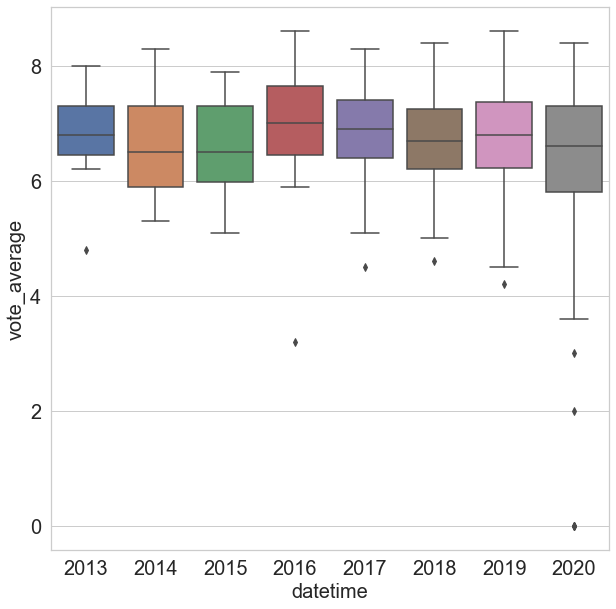

In [37]:
vote_ave = movies.loc[(movies.datetime.dt.year == 2020) | (movies.datetime.dt.year == 2019) \
                      | (movies.datetime.dt.year == 2018) | (movies.datetime.dt.year == 2017) \
                      | (movies.datetime.dt.year == 2016) | (movies.datetime.dt.year == 2015) \
                      | (movies.datetime.dt.year == 2014) | (movies.datetime.dt.year == 2013)] #ทำการเลือกข้อมูลตามปีที่ต้องการทำการวิเคราะห์
plt.figure(figsize=(10, 10))
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.boxplot(x=vote_ave.datetime.dt.year ,y="vote_average", data=vote_ave)


## กราฟเปรียบเทียบระหว่างประเภทของภาพยนตร์ตามค่าความนิยม
โดยจะเห็นว่าประเภท TV Movie นั้นมีค่าความกระจายที่สูงและมีค่ากลางที่สูงกว่าประเภทอื่นๆ รวมถึงมีค่า Quatile ที่ 1 ที่สูงกว่าค่าเฉลี่ยของประเภทภาพยนตร์อื่นๆ แต่ประเภท Action นั้นถึงจะมีจำนวนที่เยอะที่สุดแต่ค่าความนิยมนั้นมีค่ากลางที่เทียบเท่ากับประเภทอื่นๆและมี Outliner ที่สูงที่สุดเมื่อเทียบกับภาพยนตร์ประเภทอื่นๆ

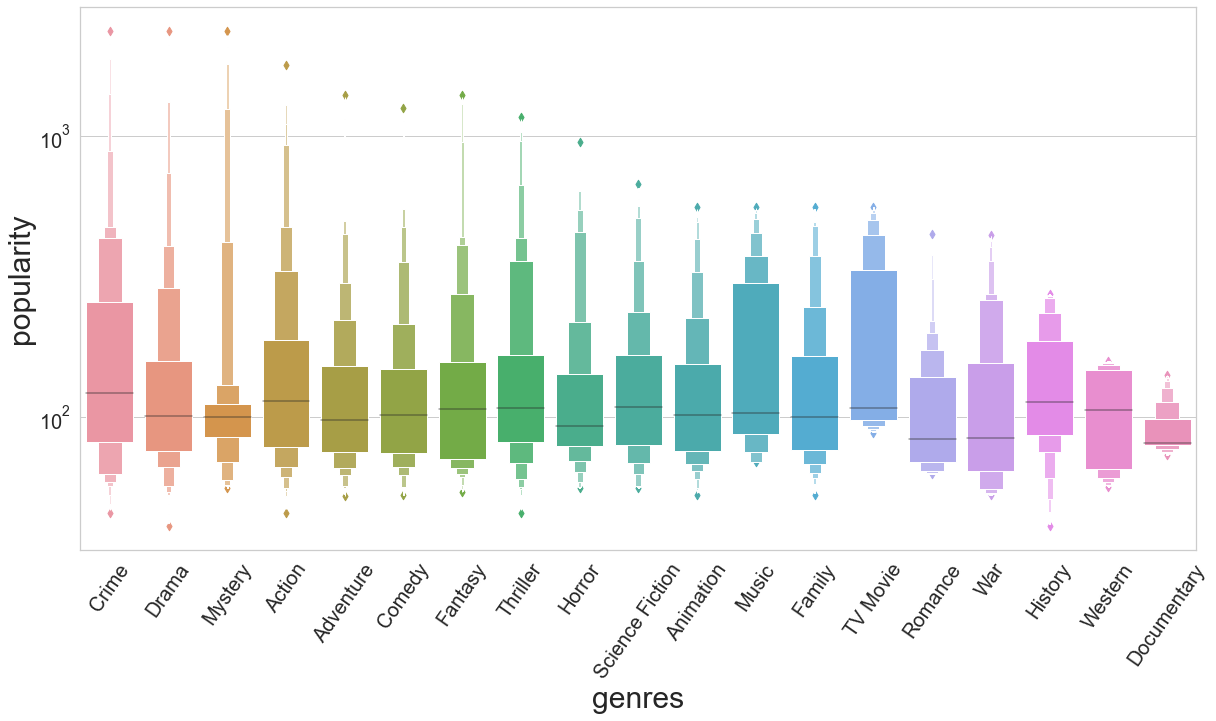

In [38]:
d={}
lis = []
for i in range(movies.genre_ids.size):
    l=eval(movies.genre_ids.iloc[i])
    for x in l:
        d.setdefault(x,[])
        d[x].append(i)#เพิ่ม Id ของแต่ละประเภทเป็น Key โดยมี Value เป็น Index ของแต่ละเรื่องที่อยู่ในประเภทนั้นๆ
for (k,v) in d.items():
    lis.append([k ,v])

#ทำการสร้าง Dataframe ใหม่เพื่อเก็บข้อมูลที่ไว้ระบุประเภทของภาพยนตร์เรื่องนั้นเนื่องจากภาพยนตร์นั้นมีหลายประเภทจึงทำการกระจายประเภทนั้นเป็นหลายๆแถวข้อมูลเพื่อนำไปใช้ในการวิเคราห์
result=pd.DataFrame()
for i in lis:
    for j in i[1]:
        rows = movies.iloc[j].copy()#คัดลอกข้อมูลของภาพยนตร์แต่ละเรื่อง
        for k in range(Genreslist.shape[0]):
            if i[0] == Genreslist.id.iloc[k]:#แปลง ID เป็นชื่อประเภทภาพยนตร์
                rows['genres']=Genreslist.name.iloc[k]
        result=result.append(rows)#โดยข้อมูลของ result จะเป็น Dataframe ที่มี Column Genres เพื่อไว้ระบุว่าภาพยนตร์เรื่องนั้นมีประเภทใดบ้าง

plt.subplots(figsize=(20, 10))
sns.boxenplot(data=result,x='genres',y='popularity')
plt.yscale('log')
plt.yticks(fontsize=20)
plt.xticks(rotation=55,fontsize=20)
plt.xlabel('genres',fontsize=30)
plt.ylabel('popularity',fontsize=30)
plt.show()

## ผลรวมของค่าความนิยมของแต่ละประเภทตั้งแต่ปี 2013-2020
โดยประเภทของภาพยนตร์นั้นจะมีประเภท Action, Adventure, Thriller, Comedy และ Drama โดยเป็นประเภทที่มีจำนวนภาพยนตร์ที่สูงจากกราฟจะเห็นได้ว่าค่าความนิยมของแต่ละประเภทนั้นสูงขึ้นเรื่อยๆตามแต่ละปีโดยในปี 2020 เป็นปีที่มีค่าความนิยมสูงที่สุดของแต่ละประเภทโดยจะเห็นว่าภาพยนตร์ประเภท Thriller นั้นจากปี 2019 นั้นมีค่าความนิยมที่น้อยกว่า Drama กับ Adventure แต่ในปี 2020 กลับมีค่าความนิยมที่สูงกว่าทั้ง 2 ประเภทแต่กับประเภท Adventure นั้นมีค่าความนิยมที่เพิ่มขึ้นน้อยที่สุดจาก 5 ประเภท

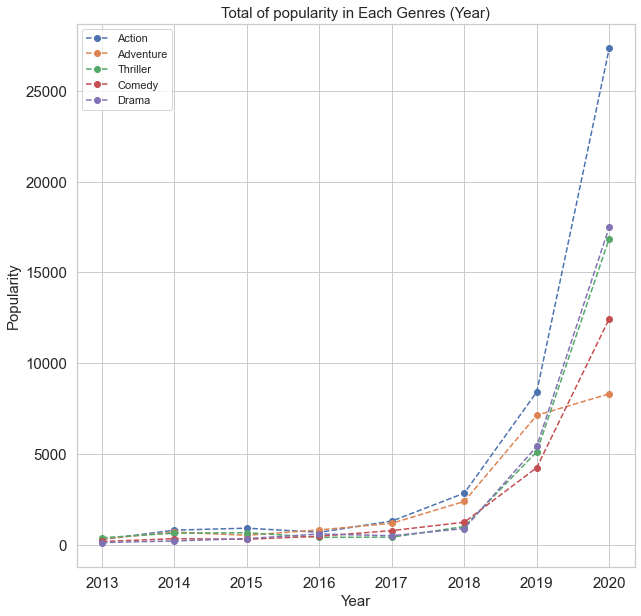

In [44]:
yea = ['2013','2014','2015','2016','2017','2018','2019','2020']
gen = ['Action','Adventure','Thriller','Comedy','Drama']
plt.figure(figsize=(10, 10))
for i in gen:#ทำการ loop เพื่อทำการสร้างเส้นของแต่ละประเภท
    for j in range(Genreslist.shape[0]):
        if i == Genreslist.name.iloc[j]:#แปลงชื่อของประเภทข้อมูลเป็น ID
            action = movies.loc[movies.genre_ids.apply(lambda x : str(Genreslist.id.iloc[j]) in x)]#เนื่องจากข้อมูลใน Dataframe นั้นประเภทของภาพยนตร์นั้นเป็น ID อยู่ใน List จึงใช้ Lambda ในการเลือกประเภทที่ต้องการภายใน List
    x1 = yea
    y1 = []
    for k in yea:
        y1.append(action.loc[action.datetime.dt.year == int(k)].popularity.sum())#เพิ่มผลรวมของค่าความนิยมของแต่ละประเภทลง List y1
    plt.plot(x1, y1, label = i , linestyle='--', marker='o')
plt.xlabel('Year' , fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Total of popularity in Each Genres (Year)',fontsize=15)
plt.legend()
plt.show()

## ผลรวมของค่าความนิยมของแต่ละประเภทในแต่ละเดือน
โดยจะเห็นว่าในทุกๆเดือนนั้นภาพยนตร์ประเภท Action นั้นมีค่าความนิยมที่สูงกว่าประเภทอื่นๆทั้งหมดเลยโดยในเดือนที่ 7 และ 8 นั้นมีภาพยนตร์ประเภท Thriller ที่มีค่าความนิยมที่สูง และในเดือนที่ 9 ภาพยนตร์ประเภท Drama ก็มีค่าความนิยมที่สูงเมื่อเทียบกับเดือนอื่นๆกับประเภทอื่นๆ

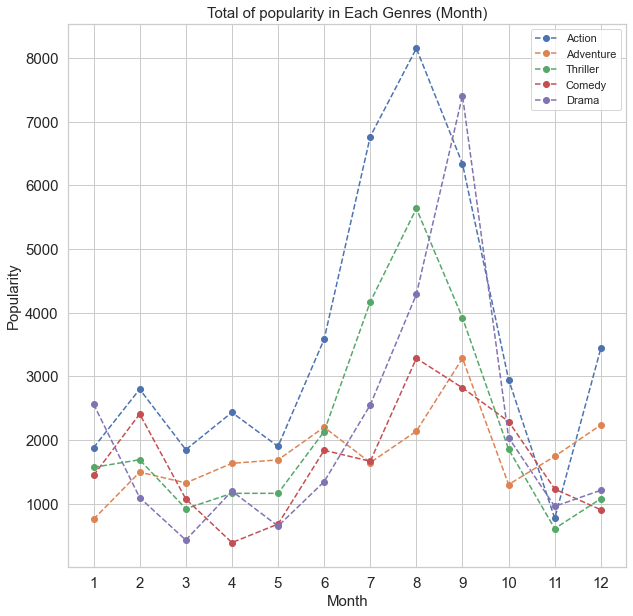

In [46]:
yea = ['1','2','3','4','5','6','7','8','9','10','11','12']
gen = ['Action','Adventure','Thriller','Comedy','Drama']
plt.figure(figsize=(10, 10))
for i in gen:#ทำการ loop เพื่อทำการสร้างเส้นของแต่ละประเภท
    for j in range(Genreslist.shape[0]):
        if i == Genreslist.name.iloc[j]:#แปลงชื่อของประเภทข้อมูลเป็น ID
            action = movies.loc[movies.genre_ids.apply(lambda x : str(Genreslist.id.iloc[j]) in x)]#เนื่องจากข้อมูลใน Dataframe นั้นประเภทของภาพยนตร์นั้นเป็น ID อยู่ใน List จึงใช้ Lambda ในการเลือกประเภทที่ต้องการภายใน List
    x1 = yea
    y1 = []
    for k in yea:
        y1.append(action.loc[action.datetime.dt.month == int(k)].popularity.sum())#เพิ่มผลรวมของค่าความนิยมของแต่ละประเภทลง List y1
    plt.plot(x1, y1, label = i , linestyle='--', marker='o')

plt.xlabel('Month' , fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Total of popularity in Each Genres (Month)',fontsize=15)
plt.legend()
plt.show()

## ผลรวมยอดโหวตของแต่ละประเภทตั้งแต่ปี 2013-2020
โดยภาพยนตร์ประเภท Action ก็ยังมียอดโหวตมากกว่าประเภทอื่นๆ โดยในช่วงปีที่ผ่านมานั้นประเภท Adventure นั้นก็มียอดโหวตที่สูงมากเช่นกัน

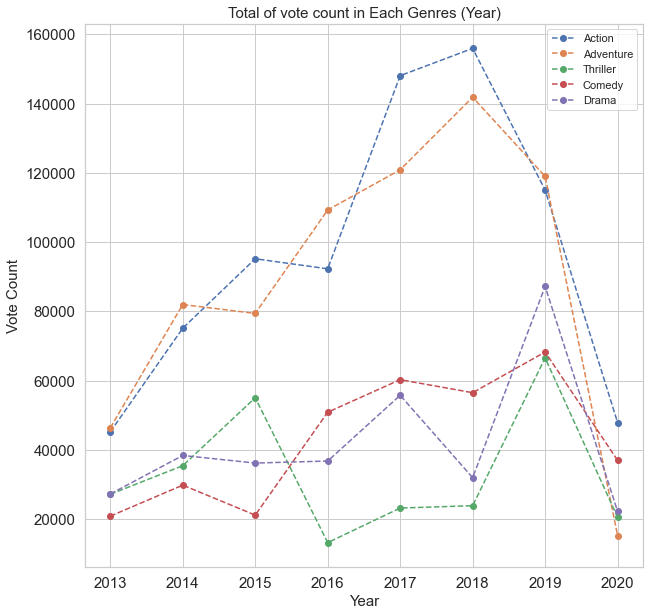

In [47]:
yea = ['2013','2014','2015','2016','2017','2018','2019','2020']
gen = ['Action','Adventure','Thriller','Comedy','Drama']
plt.figure(figsize=(10, 10))
for i in gen:#ทำการ loop เพื่อทำการสร้างเส้นของแต่ละประเภท
    for j in range(Genreslist.shape[0]):
        if i == Genreslist.name.iloc[j]:#แปลงชื่อของประเภทข้อมูลเป็น ID
            action = movies.loc[movies.genre_ids.apply(lambda x : str(Genreslist.id.iloc[j]) in x)]#เนื่องจากข้อมูลใน Dataframe นั้นประเภทของภาพยนตร์นั้นเป็น ID อยู่ใน List จึงใช้ Lambda ในการเลือกประเภทที่ต้องการภายใน List
    x1 = yea
    y1 = []
    for k in yea:
        y1.append(action.loc[action.datetime.dt.year == int(k)].vote_count.sum())#เพิ่มผลรวมของยอดโหวตของแต่ละประเภทลง List y1
    plt.plot(x1, y1, label = i , linestyle='--', marker='o')

plt.xlabel('Year' , fontsize=15)
plt.ylabel('Vote Count', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Total of vote count in Each Genres (Year)',fontsize=15)
plt.legend()
plt.show()

## ผลรวมยอดโหวตของแต่ละประเภทในแต่ละเดือน
โดยจะเห็นได้ว่าส่วนมากภาพยนตร์ประเภท Action นั้นก็ยังมียอดโหวตที่สูงในแต่ละเดือนเมื่อเทียบกับประเภทอื่นๆ แต่ในเดือนที่ 11 กลับเป็นเดือนที่มียอดโหวตของภาพยนตร์ประเภท Action ต่ำที่สุดของทั้ง 5 ประเภทและกลับเป็นประเภท Adventure ที่มียอดโหวตสูงที่สุด

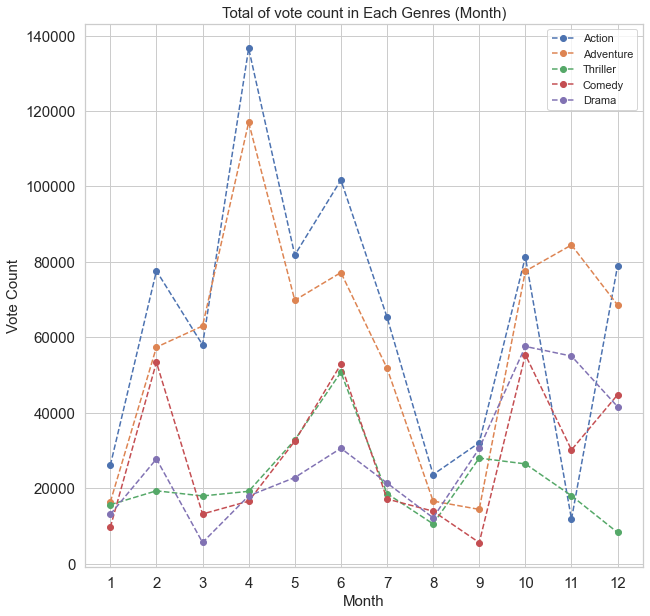

In [48]:
yea = ['1','2','3','4','5','6','7','8','9','10','11','12']
gen = ['Action','Adventure','Thriller','Comedy','Drama']
plt.figure(figsize=(10, 10))
for i in gen:#ทำการ loop เพื่อทำการสร้างเส้นของแต่ละประเภท
    for j in range(Genreslist.shape[0]):
        if i == Genreslist.name.iloc[j]:#แปลงชื่อของประเภทข้อมูลเป็น ID
            action = movies.loc[movies.genre_ids.apply(lambda x : str(Genreslist.id.iloc[j]) in x)]#เนื่องจากข้อมูลใน Dataframe นั้นประเภทของภาพยนตร์นั้นเป็น ID อยู่ใน List จึงใช้ Lambda ในการเลือกประเภทที่ต้องการภายใน List
    x1 = yea
    y1 = []
    for k in yea:
        y1.append(action.loc[action.datetime.dt.month == int(k)].vote_count.sum())#เพิ่มผลรวมของยอดโหวตของแต่ละประเภทลง List y1
    plt.plot(x1, y1, label = i , linestyle='--', marker='o')

plt.xlabel('Month' , fontsize=15)
plt.ylabel('Vote Count', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Total of vote count in Each Genres (Month)',fontsize=15)
plt.legend()
plt.show()

# Summary
โดยสรุปแล้ว ภาพยนตร์ประเภท Action เป็นภาพยนตร์ที่มีค่าความนิยมและยอดโหวตมากที่สุดเมื่อเทียบกับประเภทอื่นๆ แต่ก็เป็นประเภทที่ภาพยนตร์ส่วนมากเป็นใช้โดยประเภท Adventure ก็เป็นอีกหนึ่งประเภทที่มีค่าความนิยมที่สูงลองลงมาจากประเภท Action เพราะฉนั้นภาพยนตร์ประเภท Action และ Adventureเป็นประเภทที่มีโอกาศประสบมากที่สุดโดยควรทำการฉายในช่วงเดือน 7 ถึง 9 เนื่องจากเป็นเดือนที่มีค่าความนิยมที่สูงที่สุดและตกต่ำลงในเดือนที่ 10 ถึง 12 

อีกประเภทภาพยนตร์ที่หน้าสนใจในการทำคือประเภท Thriller เนื่องจากในช่วงปี 2019 นั้นมียอดรวมค่าความสนใจที่น้อยกว่าประเภทอื่นๆ แต่กลับในปี 2020 กับเป็นประเภทที่มีค่าความนิยมสูงเป็นอันดับ 2 ลองจาก Action และในช่วงปี 2019 ไป 2020 ก็ยังมียอดโหวตที่สูงขึ้นเมื่อเทียบกับประเภทอื่นๆ